In [1]:
# LINEAR REGRESSION MODELING FOR THE COMBINED REAL ESTATE DATASET

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

import sklearn
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [3]:
style.use('fivethirtyeight')

In [4]:
# read data into a DataFrame
# NaN values filled with 10-day average  

data = pd.read_csv('realestate_data/Combined_RealEstateData_Cleaned.csv', parse_dates = ['Date'])

In [5]:
data

,BottomTier,MiddleTier,TopTier,Lstate,Date,B_30DayChange,B_60DayChange,B_90DayChange,M_30DayChange,M_60DayChange,...,B_AvgMortgage,B_InterestMonthly,M_PrincipalMonthly,M_AvgMortgage,M_InterestMonthly,T_PrincipalMonthly,T_AvgMortgage,T_InterestMonthly,CityName,Avg_AggMortgage
0,50649,124420,198192,AR,2014-01-01,10,11,36,-36,-120,...,436.144167,296.144167,345,1071.394444,726.394444,550,1706.653333,1156.653333,Little Rock,1071.397315
1,50719,124541,198364,AR,2014-02-01,70,80,81,121,85,...,436.746944,296.746944,345,1072.436389,727.436389,551,1708.134444,1157.134444,Little Rock,1072.439259
2,50846,124831,198816,AR,2014-03-01,127,197,207,290,411,...,437.840555,296.840555,346,1074.933611,728.933611,552,1712.026667,1160.026667,Little Rock,1074.933611
3,50973,125116,199260,AR,2014-04-01,127,254,324,285,575,...,438.934167,297.934167,347,1077.387778,730.387778,553,1715.850000,1162.850000,Little Rock,1077.390648
4,51080,125354,199628,AR,2014-05-01,107,234,361,238,523,...,439.855555,298.855555,348,1079.437222,731.437222,554,1719.018889,1165.018889,Little Rock,1079.437222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,410300,770894,1131489,HI,2021-05-01,5043,8888,12304,10668,18888,...,3533.138889,2394.138889,2141,6638.253889,4497.253889,3143,9743.377500,6600.377500,Urban Honolulu,6638.256759
9326,412055,768897,1125740,DC,2021-02-01,1782,3257,5242,3757,6797,...,3548.251389,2404.251389,2135,6621.057500,4486.057500,3127,9693.872222,6566.872222,Washington,6621.060370
9327,414775,774803,1134832,DC,2021-03-01,2720,4502,5977,5906,9663,...,3571.673611,2419.673611,2152,6671.914722,4519.914722,3152,9772.164444,6620.164444,Washington,6671.917592
9328,417797,781283,1144769,DC,2021-04-01,3022,5742,7524,6480,12386,...,3597.696389,2437.696389,2170,6727.714722,4557.714722,3179,9857.733056,6678.733056,Washington,6727.714722


In [6]:
# Convert string and datetype data into numeric values so that they can be used in our algorithms

le = preprocessing.LabelEncoder()

# convert dates to numerical labels
data['Date'] = le.fit_transform(np.array(data['Date']))

# convert Lstate to numerical labels
data['Lstate'] = le.fit_transform(np.array(data['Lstate']))

# convert CityName to numerical labels
data['CityName'] = le.fit_transform(np.array(data['CityName']))

# round long float values to int
data['B_InterestMonthly'] = np.rint(np.array(data.B_InterestMonthly)).astype(int)
data['B_AvgMortgage'] = np.rint(np.array(data.B_AvgMortgage)).astype(int)
data['M_InterestMonthly'] = np.rint(np.array(data.M_InterestMonthly)).astype(int)
data['M_AvgMortgage'] = np.rint(np.array(data.M_AvgMortgage)).astype(int)
data['T_InterestMonthly'] = np.rint(np.array(data.T_InterestMonthly)).astype(int)
data['T_AvgMortgage'] = np.rint(np.array(data.T_AvgMortgage)).astype(int)
data['Avg_AggMortgage'] = np.rint(np.array(data.Avg_AggMortgage)).astype(int)

In [7]:
data.head()

,BottomTier,MiddleTier,TopTier,Lstate,Date,B_30DayChange,B_60DayChange,B_90DayChange,M_30DayChange,M_60DayChange,...,B_AvgMortgage,B_InterestMonthly,M_PrincipalMonthly,M_AvgMortgage,M_InterestMonthly,T_PrincipalMonthly,T_AvgMortgage,T_InterestMonthly,CityName,Avg_AggMortgage
0,50649,124420,198192,1,0,10,11,36,-36,-120,...,436,296,345,1071,726,550,1707,1157,50,1071
1,50719,124541,198364,1,1,70,80,81,121,85,...,437,297,345,1072,727,551,1708,1157,50,1072
2,50846,124831,198816,1,2,127,197,207,290,411,...,438,297,346,1075,729,552,1712,1160,50,1075
3,50973,125116,199260,1,3,127,254,324,285,575,...,439,298,347,1077,730,553,1716,1163,50,1077
4,51080,125354,199628,1,4,107,234,361,238,523,...,440,299,348,1079,731,554,1719,1165,50,1079


In [8]:
data.describe()

,BottomTier,MiddleTier,TopTier,Lstate,Date,B_30DayChange,B_60DayChange,B_90DayChange,M_30DayChange,M_60DayChange,...,B_AvgMortgage,B_InterestMonthly,M_PrincipalMonthly,M_AvgMortgage,M_InterestMonthly,T_PrincipalMonthly,T_AvgMortgage,T_InterestMonthly,CityName,Avg_AggMortgage
count,9330.000000,9330.000000,9.330000e+03,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,...,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000,9330.000000
mean,149914.274491,299250.106324,4.485864e+05,19.215541,44.047053,885.574062,1739.116077,2568.823580,1516.031083,2968.971919,...,1290.933762,875.000750,830.749196,2576.878992,1746.129796,1245.567203,3862.824759,2617.257556,51.987460,2576.879957
std,81866.920415,152035.970526,2.263487e+05,12.350873,25.660925,955.753655,1807.365782,2589.359282,1753.896632,3277.636431,...,704.971866,477.567191,422.331701,1309.210690,886.879145,628.743019,1949.103224,1320.360312,30.303626,1309.210934
min,50649.000000,121845.000000,1.878990e+05,0.000000,0.000000,-1149.000000,-1787.000000,-2200.000000,-3428.000000,-5042.000000,...,436.000000,296.000000,338.000000,1049.000000,711.000000,521.000000,1618.000000,1097.000000,0.000000,1049.000000
25%,89603.000000,191412.000000,2.929638e+05,7.000000,22.000000,327.000000,656.250000,993.250000,583.000000,1162.250000,...,772.000000,523.250000,531.000000,1648.000000,1117.000000,813.250000,2523.000000,1709.000000,26.000000,1648.000000
50%,120697.000000,242357.000000,3.626080e+05,21.000000,44.000000,570.000000,1135.000000,1704.000000,985.000000,1961.000000,...,1039.000000,704.000000,673.000000,2087.000000,1414.000000,1007.000000,3122.000000,2115.000000,52.000000,2087.000000
75%,184656.750000,363176.000000,5.346540e+05,31.000000,66.000000,1121.000000,2188.750000,3205.750000,1857.000000,3598.250000,...,1590.000000,1078.000000,1008.000000,3127.000000,2119.000000,1484.750000,4603.750000,3119.000000,78.000000,3127.000000
max,422637.000000,812099.000000,1.219370e+06,39.000000,88.000000,9376.000000,16541.000000,22655.000000,19716.000000,33797.000000,...,3639.000000,2466.000000,2255.000000,6993.000000,4738.000000,3387.000000,10500.000000,7113.000000,104.000000,6993.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   BottomTier          9330 non-null   int64
 1   MiddleTier          9330 non-null   int64
 2   TopTier             9330 non-null   int64
 3   Lstate              9330 non-null   int32
 4   Date                9330 non-null   int64
 5   B_30DayChange       9330 non-null   int64
 6   B_60DayChange       9330 non-null   int64
 7   B_90DayChange       9330 non-null   int64
 8   M_30DayChange       9330 non-null   int64
 9   M_60DayChange       9330 non-null   int64
 10  M_90DayChange       9330 non-null   int64
 11  T_30DayChange       9330 non-null   int64
 12  T_60DayChange       9330 non-null   int64
 13  T_90DayChange       9330 non-null   int64
 14  B_PrincipalMonthly  9330 non-null   int64
 15  B_AvgMortgage       9330 non-null   int32
 16  B_InterestMonthly   9330 non-null   int32


In [10]:
feature_cols = cols = ['Date', 'Lstate', 'CityName', 'M_InterestMonthly', 'T_InterestMonthly'\
                      , 'MiddleTier', 'TopTier', 'B_30DayChange', 'B_60DayChange', 'B_90DayChange'\
                      , 'M_30DayChange', 'M_60DayChange', 'M_90DayChange', 'T_30DayChange', 'T_60DayChange'\
                       , 'T_90DayChange', 'B_PrincipalMonthly', 'B_AvgMortgage', 'M_PrincipalMonthly'\
                       , 'BottomTier', 'T_PrincipalMonthly', 'T_AvgMortgage', 'B_InterestMonthly', 'Avg_AggMortgage']
X = data[feature_cols] # 24 features
y = data.M_AvgMortgage

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [11]:
### Testing / Scoring ###

In [12]:
# test dataset

X = X.values
Y = y
test_size = 0.20
seed = 5

# train and fit test dataset
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(\
                                    X, Y, test_size=test_size, random_state=seed)

model = KNeighborsRegressor(n_neighbors=3)
train = model.fit(X_train, Y_train)
test = model.fit(X_test, Y_test)

In [13]:
test_scores = cross_val_score(test, X, Y, cv=55, scoring='r2')
print(test_scores)

[ 0.83928776  0.96329476  0.99284179  0.98806478  0.98189864  0.98531832
  0.98462833  0.98368182  0.98274569  0.98208956  0.98428847  0.97845472
  0.98127867  0.99043521  0.98809475  0.98756287  0.98718095  0.98782914
  0.98967244  0.9867135   0.98877024  0.98762093  0.98546285  0.9885737
  0.9870054   0.98833288  0.9960185   0.9988826   0.99904575  0.99868489
  0.99825931  0.99825044  0.99883682  0.99907783  0.99802591  0.99835719
  0.99720832  0.99626131  0.99625503  0.98536251  0.96502265  0.9703742
  0.97050214  0.9627371   0.98532736  0.98756891  0.98871436  0.99077716
  0.9937542   0.9891903   0.98736699  0.97363563  0.98220561  0.90013469
 -0.2470889 ]


In [14]:
cross_val_score(knr, X, Y, cv=55, scoring='r2').mean()

0.9605432178778633

In [15]:
cross_val_score(knr, X, Y, cv=55, scoring='neg_mean_absolute_percentage_error').mean()

-0.0069361258810314835

In [16]:
cross_val_score(knr, X, Y, cv=55, scoring='max_error')

array([ -42.33333333,  -32.        ,  -14.        ,  -18.33333333,
        -22.66666667,  -26.66666667,  -23.66666667,  -25.66666667,
        -21.33333333,  -18.        ,  -22.66666667,  -21.        ,
        -19.        ,  -19.        ,  -18.        ,  -18.        ,
        -18.        ,  -20.        ,  -19.        ,  -18.66666667,
        -20.        ,  -17.        ,  -40.        ,  -23.        ,
        -33.        ,  -33.        ,  -89.33333333,  -43.        ,
        -42.        ,  -46.66666667,  -59.        ,  -56.        ,
        -38.        ,  -45.        ,  -62.        ,  -33.        ,
        -59.        ,  -63.        ,  -47.        ,  -41.66666667,
       -163.        ,  -68.33333333,  -78.        ,  -86.        ,
        -88.        ,  -98.        ,  -95.        ,  -96.        ,
        -68.        ,  -99.        , -106.        , -150.        ,
       -110.        , -159.66666667, -773.        ])

In [17]:
cross_val_score(knr, X, Y, cv=55, scoring='neg_mean_poisson_deviance').mean()

-0.505796595056235

In [18]:
Y.shape

(9330,)

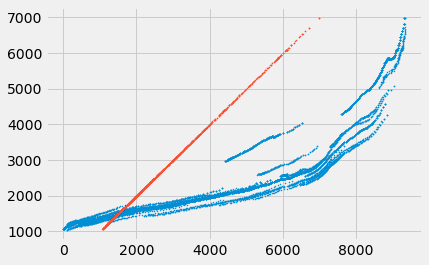

In [19]:
X2 = list(set(range(1,9331)))

plt.scatter(X2,Y, s=1)
plt.scatter(knr.predict(X_test), Y_test, cmap='Greens_r', s=1)
plt.show()

In [20]:
knr.predict(X_test)

array([3634.        , 1227.        , 4064.        , ..., 1128.33333333,
       3811.        , 1269.        ])

In [21]:
# That looks a bit off, definitely going to dig deeper to check it out.

# Now to manually calcualte our regression line and r2 as a sanity check:

In [22]:
# We'll filter the data by state so it's easier to see the relationship of the data without it being too crowded:
from statistics import mean

data_filtered = data[data['Lstate']==28]

data_filtered

,BottomTier,MiddleTier,TopTier,Lstate,Date,B_30DayChange,B_60DayChange,B_90DayChange,M_30DayChange,M_60DayChange,...,B_AvgMortgage,B_InterestMonthly,M_PrincipalMonthly,M_AvgMortgage,M_InterestMonthly,T_PrincipalMonthly,T_AvgMortgage,T_InterestMonthly,CityName,Avg_AggMortgage
336,61750,134902,208054,28,2,-27,-55,-27,-54,-99,...,532,361,374,1162,788,577,1792,1215,104,1162
337,61750,134902,208054,28,2,-27,-55,-27,-54,-99,...,532,361,374,1162,788,577,1792,1215,0,1162
338,61750,134902,208054,28,2,-27,-55,-27,-54,-99,...,532,361,374,1162,788,577,1792,1215,25,1162
339,61750,134902,208054,28,2,-27,-55,-27,-54,-99,...,532,361,374,1162,788,577,1792,1215,94,1162
340,61750,134902,208054,28,2,-27,-55,-27,-54,-99,...,532,361,374,1162,788,577,1792,1215,19,1162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182,98627,204949,311271,28,88,1392,2725,3962,2746,5327,...,849,576,569,1765,1196,864,2680,1816,94,1765
3183,98627,204949,311271,28,88,1392,2725,3962,2746,5327,...,849,576,569,1765,1196,864,2680,1816,25,1765
3184,98627,204949,311271,28,88,1392,2725,3962,2746,5327,...,849,576,569,1765,1196,864,2680,1816,20,1765
3185,98627,204949,311271,28,88,1392,2725,3962,2746,5327,...,849,576,569,1765,1196,864,2680,1816,19,1765


In [23]:
# x-value as a scatter-plot is == y value in our sklearn algorithm

xs = np.array(data_filtered['M_AvgMortgage'].values, dtype=np.float64)

# (the x values from our sklearn algorithm) y-value columns to check:


y = np.array(data_filtered['BottomTier'].values, dtype=np.float64)
y2 = np.array(data_filtered['MiddleTier'].values, dtype=np.float64)
y3 = np.array(data_filtered['TopTier'].values, dtype=np.float64)
y4 = np.array(data_filtered['B_30DayChange'].values, dtype=np.float64)
y5 = np.array(data_filtered['B_60DayChange'].values, dtype=np.float64)
y6 = np.array(data_filtered['B_90DayChange'].values, dtype=np.float64)
y7 = np.array(data_filtered['M_30DayChange'].values, dtype=np.float64)
y8 = np.array(data_filtered['M_60DayChange'].values, dtype=np.float64)
y9 = np.array(data_filtered['M_90DayChange'].values, dtype=np.float64)
y10 = np.array(data_filtered['T_30DayChange'].values, dtype=np.float64)
y11 = np.array(data_filtered['T_60DayChange'].values, dtype=np.float64)
y12 = np.array(data_filtered['T_90DayChange'].values, dtype=np.float64)
y13 = np.array(data_filtered['B_PrincipalMonthly'].values, dtype=np.float64)
y14 = np.array(data_filtered['B_AvgMortgage'].values, dtype=np.float64)
y15 = np.array(data_filtered['B_InterestMonthly'].values, dtype=np.float64)
y16 = np.array(data_filtered['M_PrincipalMonthly'].values, dtype=np.float64)
#y17 = np.array(data_filtered['M_AvgMortgage'].values, dtype=np.float64) # <<< Duplicate of our xs-value
y18 = np.array(data_filtered['M_InterestMonthly'].values, dtype=np.float64)
y19 = np.array(data_filtered['T_PrincipalMonthly'].values, dtype=np.float64)
y20 = np.array(data_filtered['T_AvgMortgage'].values, dtype=np.float64)
y21 = np.array(data_filtered['T_InterestMonthly'].values, dtype=np.float64)
#y22 = np.array(data_filtered['Avg_AggMortgage'].values, dtype=np.float64)# <<< Proxy
y23 = np.array(data_filtered['Date'].values, dtype=np.float64)
#y24 = np.array(data_filtered['Lstate'].values, dtype=np.float64)# <<<< Useless data / Noise
y25 = np.array(data_filtered['CityName'].values, dtype=np.float64)

# After running through this once, we've discovered our Noise, as well as our hidden proxy variable
# Now we can comment those out, and run it again:::

In [24]:
# Lets keep track of all of our slope, y-intercept & r2 values to do an aggregate calculation at the end of our checks:

slopes = []
y_ints = []
r_2 = []

In [25]:
def best_fit_slope_and_intercept(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean (xs * ys)) / 
        ((mean(xs))**2 - (mean(xs**2)))
        )
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

slope(m) = 61.995677898984056
y-intercept(b) = -10936.879854737286
r-squared(r2) = 0.9988210075648603



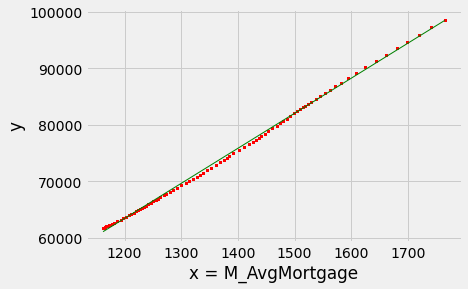

In [26]:
y = y # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 116.13134802945653
y-intercept(b) = -1.5032275547855534
r-squared(r2) = 0.9999964441383974



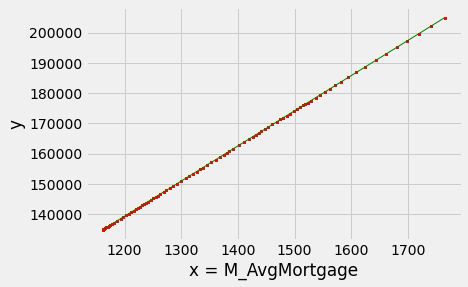

In [27]:
y = y2 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 170.2667972134193
y-intercept(b) = 10934.692587577243
r-squared(r2) = 0.9998488588475455



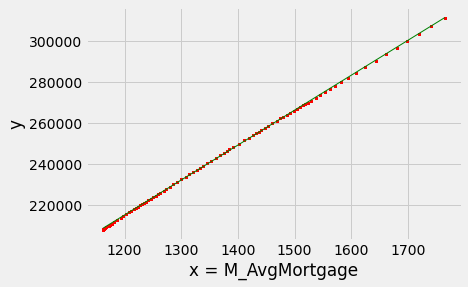

In [28]:
y = y3 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 1.5625038738541615
y-intercept(b) = -1733.7810929980865
r-squared(r2) = 0.7615540004495837



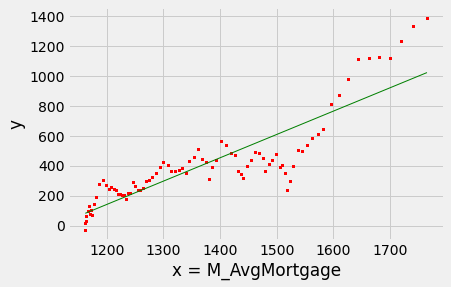

In [29]:
y = y4 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 3.033202543021798
y-intercept(b) = -3355.5412058871984
r-squared(r2) = 0.7698614705277933



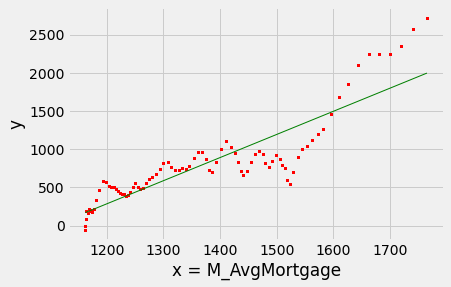

In [30]:
y = y5 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 4.40882545291947
y-intercept(b) = -4859.4969905787275
r-squared(r2) = 0.77819392029723



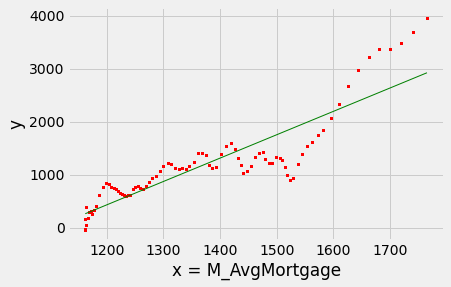

In [31]:
y = y6 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 2.770790075594573
y-intercept(b) = -3022.056847869789
r-squared(r2) = 0.6765364135844716



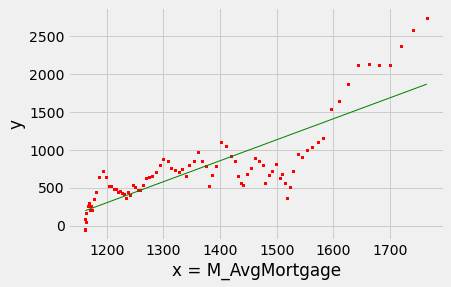

In [32]:
y = y7 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 5.345044531246123
y-intercept(b) = -5801.54559614503
r-squared(r2) = 0.6843414262621033



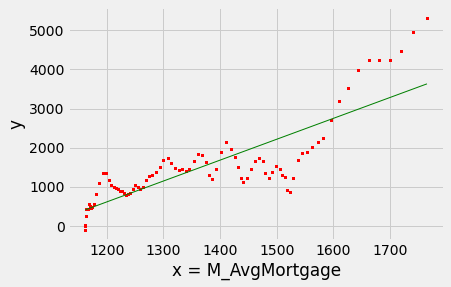

In [33]:
y = y8 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 7.720638725695987
y-intercept(b) = -8332.03676480895
r-squared(r2) = 0.6920581703766673



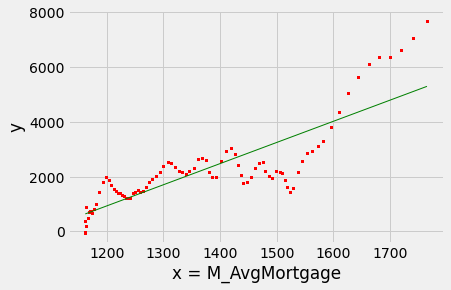

In [34]:
y = y9 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 3.978971145486683
y-intercept(b) = -4310.191224907678
r-squared(r2) = 0.6432639290897083



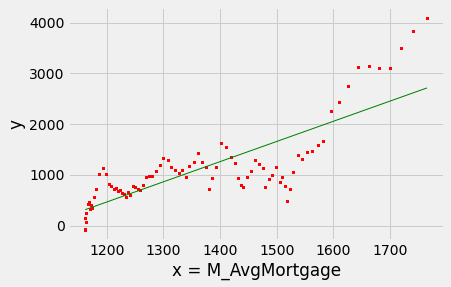

In [35]:
y = y10 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 7.656825427011261
y-intercept(b) = -8247.457908245677
r-squared(r2) = 0.6505304365048036



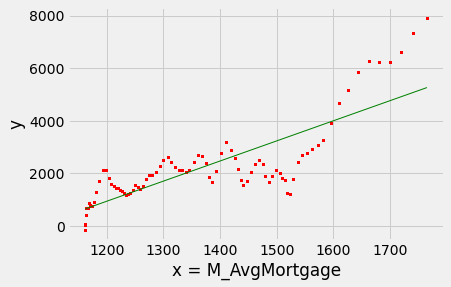

In [36]:
y = y11 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 11.032261677257015
y-intercept(b) = -11804.306719525717
r-squared(r2) = 0.6576082013434461



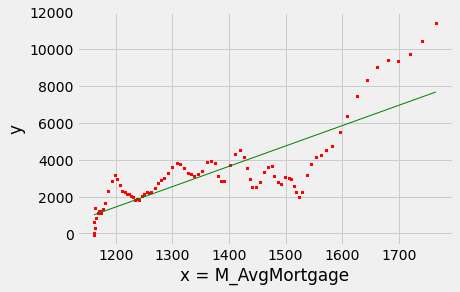

In [37]:
y = y12 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 0.17213066417136416
y-intercept(b) = -30.782498236235483
r-squared(r2) = 0.9986646392493247



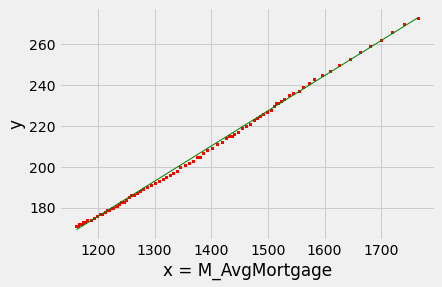

In [38]:
y = y13 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 0.5338275573430938
y-intercept(b) = -94.17218774253251
r-squared(r2) = 0.9988194515068535



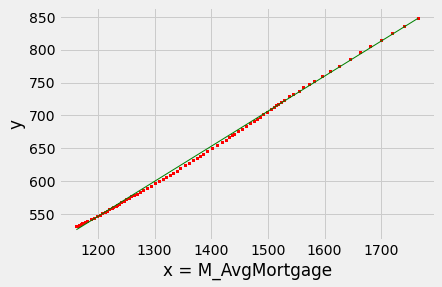

In [39]:
y = y14 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 0.3616968931717297
y-intercept(b) = -63.38968950629703
r-squared(r2) = 0.9988006706172264



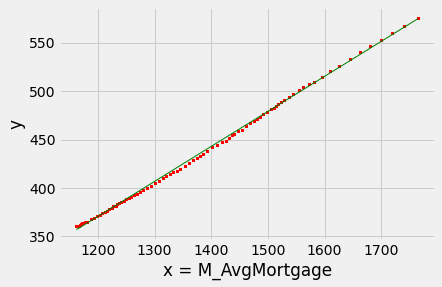

In [40]:
y = y15 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 0.32291373708209953
y-intercept(b) = -0.9619529331902754
r-squared(r2) = 0.9999597573884992



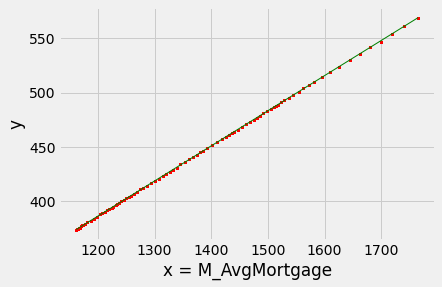

In [41]:
y = y16 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

In [42]:
#y = y17 # we only need to change the right-hand value here for our list of y-values

#m,b = best_fit_slope_and_intercept(xs, y)
#regression_line = [(m*x) + b for x in xs]
#r_squared = coefficient_of_determination(y, regression_line)
#print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
#slopes.append(m)
#y_ints.append(b)
#r_2.append(r_squared)

#plt.scatter(xs,y, s=5, c='red')
#plt.plot(xs,regression_line, linewidth=1, c='green')
#plt.xlabel("x = M_AvgMortgage")
#plt.ylabel("y")
#plt.show()

# yet another proxy column that needs to be removed

slope(m) = 0.6770862629178961
y-intercept(b) = 0.9619529331963577
r-squared(r2) = 0.9999908465525136



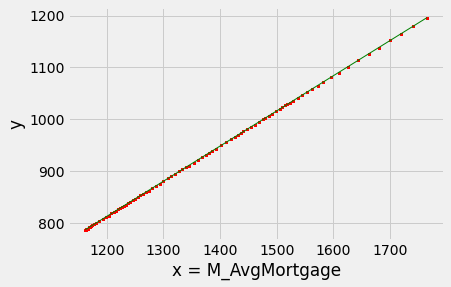

In [43]:
y = y18 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 0.4724781972782296
y-intercept(b) = 30.537894086842925
r-squared(r2) = 0.9998404027778556



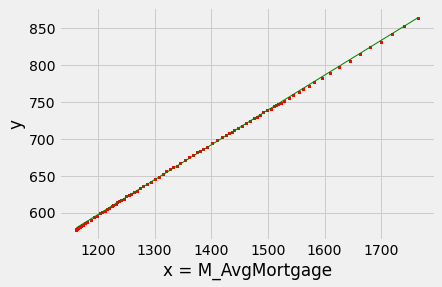

In [44]:
y = y19 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 1.466063581476322
y-intercept(b) = 94.33640826911096
r-squared(r2) = 0.9998446780305991



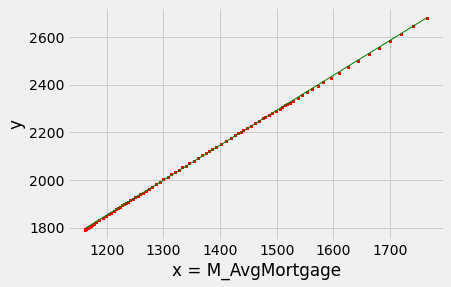

In [45]:
y = y20 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

slope(m) = 0.9935853841980838
y-intercept(b) = 63.79851418228009
r-squared(r2) = 0.9998339958559394



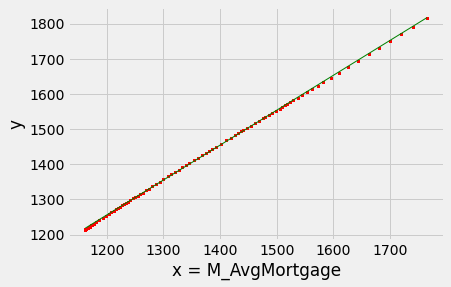

In [46]:
y = y21 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

In [47]:
#y = y22 # we only need to change the right-hand value here for our list of y-values

#m,b = best_fit_slope_and_intercept(xs, y)
#regression_line = [(m*x) + b for x in xs]
#r_squared = coefficient_of_determination(y, regression_line)
#print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
#slopes.append(m)
#y_ints.append(b)
#r_2.append(r_squared)

#plt.scatter(xs,y, s=5, c='red')
#plt.plot(xs,regression_line, linewidth=1, c='green')
#plt.xlabel("x = M_AvgMortgage")
#plt.ylabel("y")
#plt.show()

# It would seem we have another proxy column that needs to be removed

slope(m) = 0.15470714779636552
y-intercept(b) = -168.6426536303106
r-squared(r2) = 0.9676617496466936



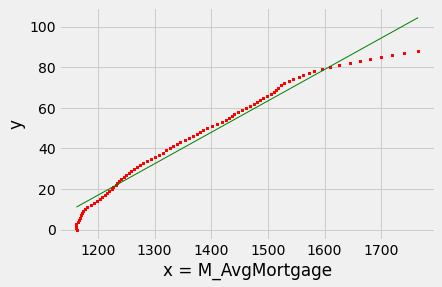

In [48]:
y = y23 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

In [49]:
#y = y24 # we only need to change the right-hand value here for our list of y-values

#m,b = best_fit_slope_and_intercept(xs, y)
#regression_line = [(m*x) + b for x in xs]
#r_squared = coefficient_of_determination(y, regression_line)
#print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
#slopes.append(m)
#y_ints.append(b)
#r_2.append(r_squared)

#plt.scatter(xs,y, s=5, c='red')
#plt.plot(xs,regression_line, linewidth=1, c='green')
#plt.xlabel("x = M_AvgMortgage")
#plt.ylabel("y")
#plt.show()

# This one is the numeric-encoding of Lstate (of no use in our predictions of M_AvgMortgage)

slope(m) = 0.0006136068829302092
y-intercept(b) = 39.79372565978119
r-squared(r2) = 7.025599151444517e-06



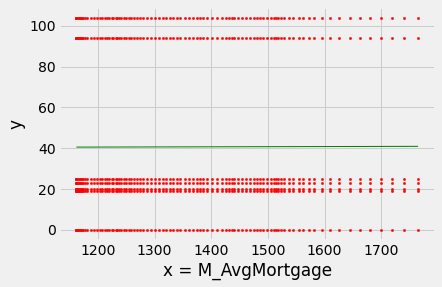

In [50]:
y = y25 # we only need to change the right-hand value here for our list of y-values

m,b = best_fit_slope_and_intercept(xs, y)
regression_line = [(m*x) + b for x in xs]
r_squared = coefficient_of_determination(y, regression_line)
print("slope(m) = {}\ny-intercept(b) = {}\nr-squared(r2) = {}\n".format(m,b,r_squared))
slopes.append(m)
y_ints.append(b)
r_2.append(r_squared)

plt.scatter(xs,y, s=5, c='red')
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.xlabel("x = M_AvgMortgage")
plt.ylabel("y")
plt.show()

# This one is the numeric-encoding of CityName (of little, but some use in our predictions of M_AvgMortgage)

In [51]:
# a summarization of our m,b & r2 values:

avg_m = sum(slopes)/len(slopes)
avg_b = sum(y_ints)/len(y_ints)
avg_r2 = sum(r_2)/len(r_2)


print("avg_m = {}\navg_b = {}\navg_r2 = {}\n".format(avg_m, avg_b, avg_r2))

avg_m = 18.22990861937569
avg_b = -2345.3920605726835
avg_r2 = 0.8307289771005124



r_squared = 0.8307289771005124


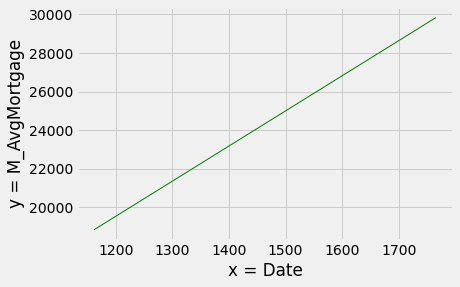

In [58]:
# Now this looks more accurate. 
# By using our average m and b, and following the standard [y = (m*x)+b], we get the following line
# when plotting our y= M_AvgMortgage across a x= Date axis to make predictions on:::

m = avg_m
b = avg_b
xs = np.array(data_filtered['M_AvgMortgage'].values, dtype=np.float64)
y = np.array(data_filtered['Date'].values, dtype=np.float64)
print("r_squared = {}".format(avg_r2))

regression_line = [(m*x) + b for x in xs]

plt.xlabel("x = Date")
plt.plot(xs,regression_line, linewidth=1, c='green')
plt.ylabel("y = M_AvgMortgage")
plt.show()